In [1]:
import visualise
import leaf_encoding
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# Get data and PCA encoding
train_ds, test_ds, train_labels, test_labels, pca, transformed = leaf_encoding.get_encoding()
ranges = leaf_encoding.new_random_leaf_from_distribution(train_ds, train_labels, pca, draw=False)

<IPython.core.display.Javascript object>


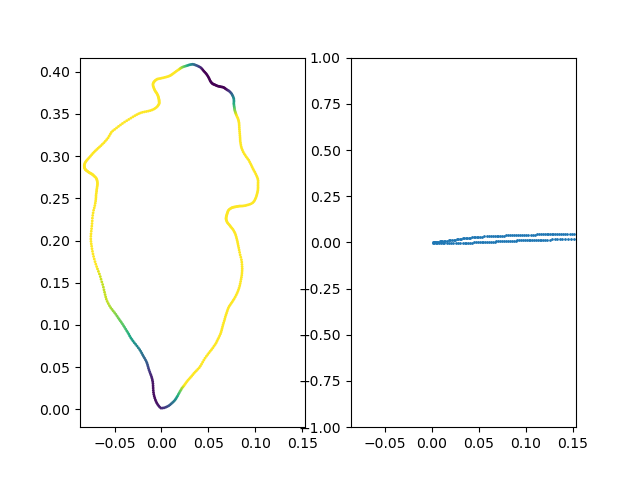

interactive(children=(FloatSlider(value=-0.40926264838534077, description='comp1', max=2.6884335208079735, min…

In [13]:
fig, axs = plt.subplots(1, 2)

starting_leaf = train_ds[0].reshape(train_ds[0].shape[0]*train_ds[0].shape[1])
starting_weights = leaf_encoding.compress(starting_leaf, pca.components_[:50], pca)
original_shape = train_ds[0].shape

outline1 = axs[0].scatter(train_ds[0][:,0],train_ds[0][:,1], s=1)
outline2 = axs[1].scatter(train_ds[0][:,0],train_ds[0][:,2], s=1)
plt.ylim([-1, 1])

def update(comp1, comp2, comp3):
    updated_weights = starting_weights[:]
    updated_weights[0] = comp1
    updated_weights[1] = comp2
    updated_weights[2] = comp3
    reprojection = leaf_encoding.decompress(updated_weights, pca.components_[:50], pca)
    unrolled = reprojection.reshape(original_shape) # restack
    outline1.set_offsets(unrolled[:,:2])
    outline1.set_array(unrolled[:,2])
    outline2.set_offsets(unrolled[:,1:])
    fig.canvas.draw_idle()

interact(update, \
         comp1 = widgets.FloatSlider(value=starting_weights[0], min=ranges[0][0], max=ranges[1][0]), \
         comp2 = widgets.FloatSlider(value=starting_weights[1], min=ranges[0][1], max=ranges[1][1]), \
         comp3 = widgets.FloatSlider(value=starting_weights[2], min=ranges[0][2], max=ranges[1][2]));




In [30]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

<IPython.core.display.Javascript object>


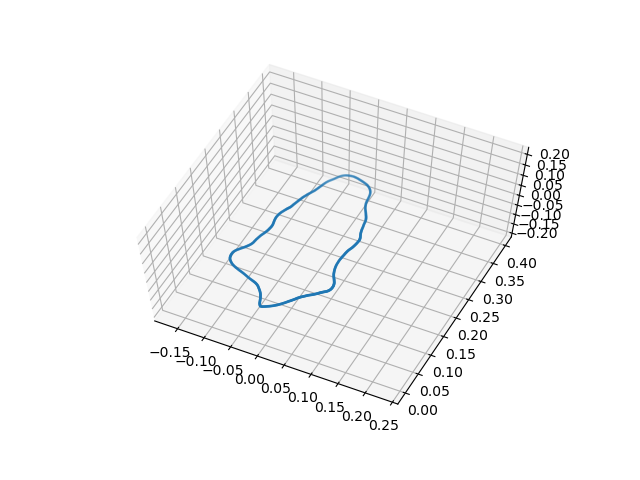

interactive(children=(FloatSlider(value=-0.40926264838534077, description='comp1', max=2.6884335208079735, min…

<function __main__.update(comp1, comp2, comp3, comp4, comp5, comp6, comp7, comp8, comp9, comp10)>

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

starting_leaf = train_ds[0].reshape(train_ds[0].shape[0]*train_ds[0].shape[1])
starting_weights = leaf_encoding.compress(starting_leaf, pca.components_[:50], pca)
original_shape = train_ds[0].shape

scatterplot = ax.scatter(xs=train_ds[0][:,0], ys=train_ds[0][:,1], zs=train_ds[0][:,2], s=1)
set_axes_equal(ax)

def update(comp1, comp2, comp3, comp4, comp5, comp6, comp7, comp8, comp9, comp10):
    updated_weights = starting_weights[:]
    updated_weights[0] = comp1
    updated_weights[1] = comp2
    updated_weights[2] = comp3
    updated_weights[3] = comp4
    updated_weights[4] = comp5
    updated_weights[5] = comp6
    updated_weights[6] = comp7
    updated_weights[7] = comp8
    updated_weights[8] = comp9
    updated_weights[9] = comp10
    
    reprojection = leaf_encoding.decompress(updated_weights, pca.components_[:50], pca)
    unrolled = reprojection.reshape(original_shape) # restack
    scatterplot._offsets3d = (unrolled[:,0],unrolled[:,1],unrolled[:,2])
    fig.canvas.draw_idle()

interact(update, \
         comp1 = widgets.FloatSlider(value=starting_weights[0], min=ranges[0][0], max=ranges[1][0]), \
         comp2 = widgets.FloatSlider(value=starting_weights[1], min=ranges[0][1], max=ranges[1][1]), \
         comp3 = widgets.FloatSlider(value=starting_weights[2], min=ranges[0][2], max=ranges[1][2]), \
         comp4 = widgets.FloatSlider(value=starting_weights[3], min=ranges[0][3], max=ranges[1][3]), \
         comp5 = widgets.FloatSlider(value=starting_weights[4], min=ranges[0][4], max=ranges[1][4]), \
         comp6 = widgets.FloatSlider(value=starting_weights[5], min=ranges[0][5], max=ranges[1][5]), \
         comp7 = widgets.FloatSlider(value=starting_weights[6], min=ranges[0][6], max=ranges[1][6]), \
         comp8 = widgets.FloatSlider(value=starting_weights[7], min=ranges[0][7], max=ranges[1][7]), \
         comp9 = widgets.FloatSlider(value=starting_weights[8], min=ranges[0][8], max=ranges[1][8]), \
         comp10 = widgets.FloatSlider(value=starting_weights[9], min=ranges[0][9], max=ranges[1][9]), \
        )



In [18]:
limit

(-0.019775051112857378, 0.4152760733700049)

In [10]:
pca.mean_.shape

(1500,)